In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [21]:
from unstructured.partition.auto import partition

file_path = r"C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\Ship_word_set.pdf"
elements = partition(filename=file_path, strategy="hi_res", languages=['kor', 'eng'])

No features in text.
No features in text.


In [22]:
print(f"파티션된 요소 수: {len(elements)}")

for element in elements[:2]:
    # Element 유형 확인
    print(f"Type: {element.category}")
    
    # 텍스트 내용 접근
    print(f"Text: {element.text}")
    
    # 메타데이터 접근
    print(f"Page: {element.metadata.page_number}")
    print(f"Language: {element.metadata.languages}")

    # Dict로 변환
    print("Dict:")
    pprint(element.to_dict())

    print("-" * 100)

파티션된 요소 수: 400
Type: Image
Text: 1. 일반용어 
Page: 1
Language: ['kor']
Dict:
{'element_id': '14870dd21a09e2b3aa747337f5dd407a',
 'metadata': {'coordinates': {'layout_height': 1975,
                              'layout_width': 1425,
                              'points': ((np.float64(0.1666388888888889),
                                          np.float64(-1.3777777777777247)),
                                         (np.float64(0.1666388888888889),
                                          np.float64(280.9555555555556)),
                                         (np.float64(1425.3333055555552),
                                          np.float64(280.9555555555556)),
                                         (np.float64(1425.3333055555552),
                                          np.float64(-1.3777777777777247))),
                              'system': 'PixelSpace'},
              'file_directory': 'C:\\ITStudy\\100_SelfProject\\2nd_TechSeminar\\Data',
              'filename': 'Ship

In [23]:
import fitz
from PIL import Image, ImageDraw

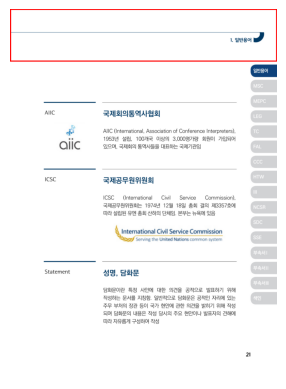

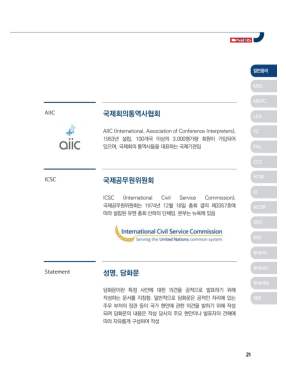

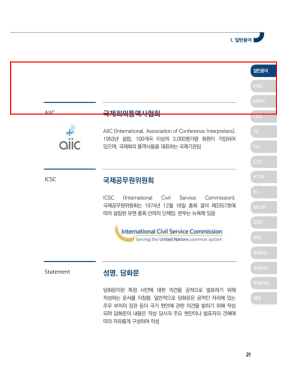

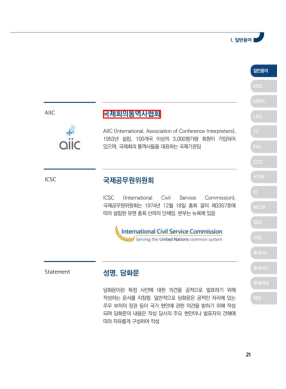

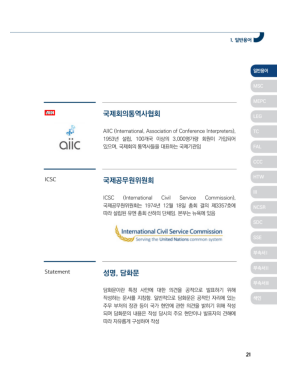

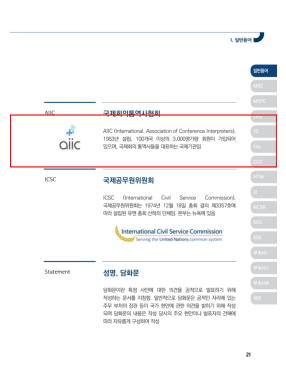

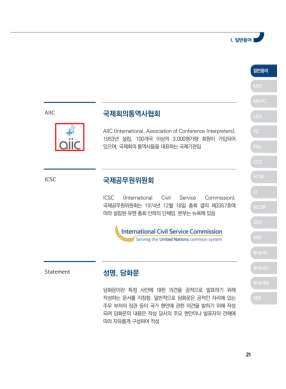

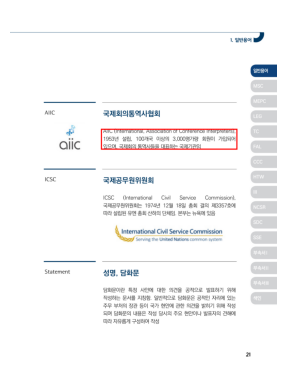

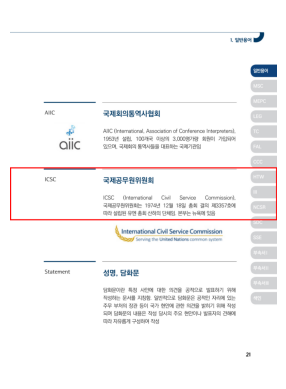

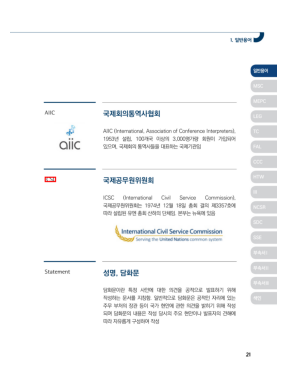

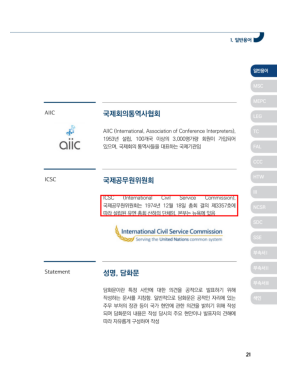

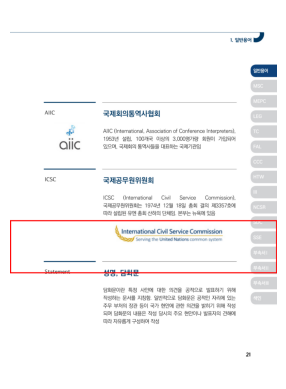

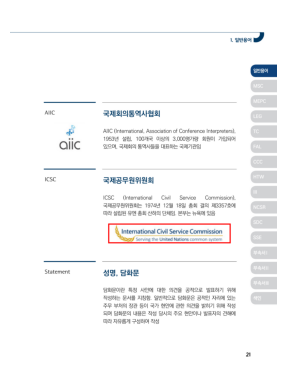

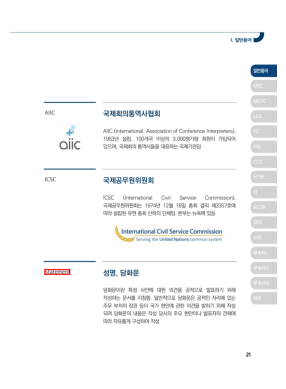

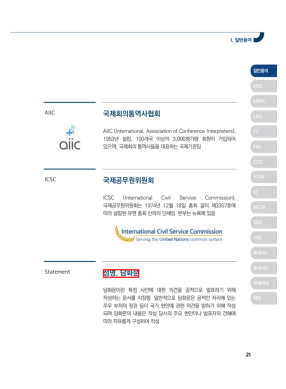

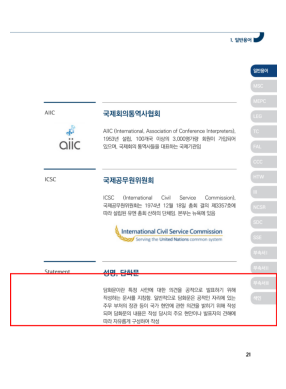

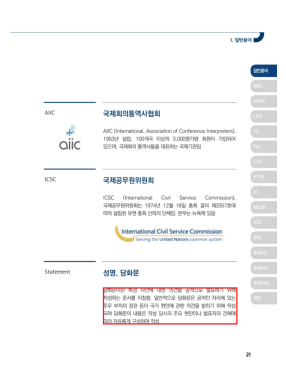

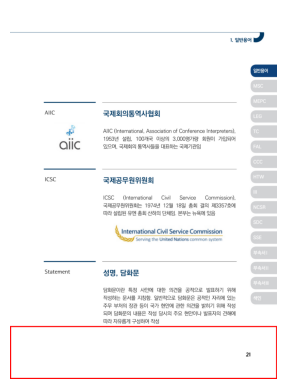

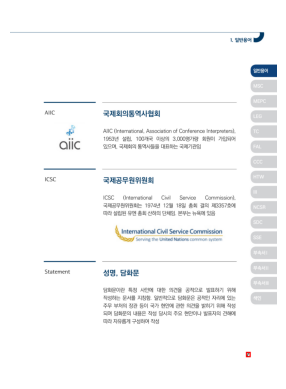

In [25]:
page_to_display = 15
elements_on_page = [el for el in elements if el.metadata.page_number == page_to_display]

doc = fitz.open(file_path)
page = doc.load_page(page_to_display - 1)
pix = page.get_pixmap(dpi=200)
page_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)


for el in elements_on_page:
    image_copy = page_image.copy()    
    draw = ImageDraw.Draw(image_copy)

    # Element의 메타데이터에서 좌표 정보를 가져옵니다.
    coords = el.metadata.coordinates.points
    
    # 좌표 순서: (왼쪽-위, 오른쪽-위, 오른쪽-아래, 왼쪽-아래)
    # 사각형을 그리기 위해 왼쪽-위, 오른쪽-아래 좌표만 사용합니다.
    top_left = coords[0]
    bottom_right = coords[2]

    # 사각형 그리기
    draw.rectangle((top_left, bottom_right), outline="red", width=6)

    plt.imshow(image_copy)
    plt.axis('off')
    plt.show()

doc.close()